<font color=#163e5a>  
    <h1>Find the .npz files</h1>
    <a href = "https://www.pytables.org/cookbook/inmemory_hdf5_files.html" target = "_blank">Documentation</a>
</font>

In [4]:
%%bash
cd Pt_p2/pynxraw
ls *.npz

S1398_ampdispstrain_gap_iso0.2_mode_avg3_apodize_blackman_lab-frame.npz
S1398_avg_obj_prtf_gap_iso0.2_mode_avg3_apodize_blackman.npz
S1398_maskpynx_norm_128_300_294_1_1_1.npz
S1398_pynx_norm_128_300_294_1_1_1.npz


Pt_p2/pynxraw/S1398_ampdispstrain_gap_iso0.2_mode_avg3_apodize_blackman_lab-frame.npz

In [37]:
%run -i Scripts/PlotNPZ

Path to file from current folder: Pt_p2/pynxraw/S1398_ampdispstrain_gap_iso0.2_mode_avg3_apodize_blackman_lab-frame.npz
Stored arrays :['amp', 'bulk', 'displacement', 'strain']


interactive(children=(Dropdown(description='Array used:', options=('amp', 'bulk', 'displacement', 'strain'), s…

<font color=#163e5a>  
    <h1>Find the .cxi files</h1>
    <a href = "https://raw.githubusercontent.com/cxidb/CXI/master/cxi_file_format.pdf" target = "_blank">Documentation</a>
</font>

In [6]:
%%bash
cd Pt_p2/pynxraw
ls *.cxi

S1398_pynx_norm_128_300_294_1_1_1-2020-12-03T10-44-11_Run0019_LLKf000.1524_LLK4828897416.5916_SupportThreshold0.14254.cxi
S1398_pynx_norm_128_300_294_1_1_1-2020-12-03T10-44-45_Run0020_LLKf000.1371_LLK5106613636.0168_SupportThreshold0.10094.cxi
S1398_pynx_norm_128_300_294_1_1_1-2020-12-03T10-45-51_Run0022_LLKf000.1473_LLK4969885945.3201_SupportThreshold0.14390.cxi
S1398_pynx_norm_128_300_294_1_1_1-2020-12-03T10-54-34_Run0037_LLKf000.1530_LLK4964432716.3696_SupportThreshold0.10306.cxi
S1398_pynx_norm_128_300_294_1_1_1-2020-12-03T10-56-16_Run0040_LLKf000.1437_LLK4936279356.4796_SupportThreshold0.13960.cxi
S1398_pynx_norm_128_300_294_1_1_1-2020-12-03T10-59-36_Run0046_LLKf000.1456_LLK4796542525.2914_SupportThreshold0.14391.cxi
S1398_pynx_norm_128_300_294_1_1_1-2020-12-03T11-01-14_Run0049_LLKf000.1443_LLK5064797401.4282_SupportThreshold0.14046.cxi
S1398_pynx_norm_128_300_294_1_1_1-2020-12-03T11-05-30_Run0057_LLKf000.1454_LLK5000520944.5953_SupportThreshold0.10299.cxi
S1398_pynx_norm_128_300_

In [14]:
with tb.open_file("Pt_p2/pynxraw/S1398_pynx_norm_128_300_294_1_1_1.cxi", "r") as f:
    data = f.root.entry_1.instrument_1.detector_1.data[:]

Pt_p2/pynxraw/S1398_pynx_norm_128_300_294_1_1_1.cxi

In [57]:
%run -i Scripts/PlotCXI

Path to file from current folder: Pt_p2/pynxraw/S1398_pynx_norm_128_300_294_1_1_1.cxi


Pt_p2/pynxraw/S1398_pynx_norm_128_300_294_1_1_1.cxi (File) ''
Last modif.: 'Thu Dec  3 10:33:39 2020'
Object Tree: 
/ (RootGroup) ''
/cxi_version (Array()) ''
/entry_1 (Group) ''
/entry_1/program_name (UnImplemented()) ''
/entry_1/start_time (UnImplemented()) ''
/entry_1/data_1 (Group) ''
/entry_1/data_1/data (SoftLink) -> /entry_1/instrument_1/detector_1/data
/entry_1/instrument_1 (Group) ''
/entry_1/instrument_1/name (UnImplemented()) ''
/entry_1/instrument_1/beam_1 (Group) ''
/entry_1/instrument_1/beam_1/incident_energy (Array()) ''
/entry_1/instrument_1/beam_1/incident_wavelength (Array()) ''
/entry_1/instrument_1/detector_1 (Group) ''
/entry_1/instrument_1/detector_1/data (CArray(128, 300, 294), shuffle, zlib(4)) ''
/entry_1/instrument_1/detector_1/distance (Array()) ''
/entry_1/instrument_1/detector_1/mask (CArray(128, 300, 294), shuffle, zlib(4)) ''
/entry_1/instrument_1/detector_1/x_pixel_si

interactive(children=(Dropdown(description='First 2 axes:', options=('xy', 'yz', 'xz'), style=DescriptionStyle…

In [30]:
np.linspace?

In [36]:
np.arange?

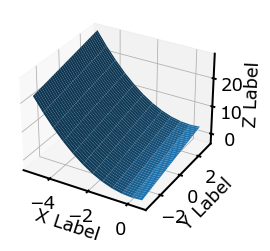

In [52]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt
import random

def fun(x, y):
    return x**2 + y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.arange(-5.0, 1.0, 0.5)

y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [55]:
X.shape
Z.shape

(120, 12)

In [45]:
with tb.open_file("Pt_p2/pynxraw/S1398_pynx_norm_128_300_294_1_1_1.cxi", "r") as f:

    # Since .cxi files follow a specific architectture, we know where our data is.
    data = f.root.entry_1.instrument_1.detector_1.data[:]

In [49]:
type(data[:, :, 0])

numpy.ndarray

In [50]:
data.type

AttributeError: 'numpy.ndarray' object has no attribute 'type'